In [1]:
import matplotlib.pyplot as plt
from Functions_plotting import c1,c2,c3,c4,c5
import numpy as np

In [2]:
# Yield bar plot
def yield_boxandwhisker(Xs,ax,Ys,col_type):
        
    # Set design
    if col_type != 4:
        ls = ['--','-',':','-.']
    else:
        ls = [':','--','-','-.']
    if col_type == 1:
        cols = [c4,c5,c4]
    elif col_type == 2:
        cols = [c4,c5,c4,c4]
    elif col_type == 3:
        cols = [c4,c5,c4]
    elif col_type == 4:
        cols = [c4,c4,c5]
        
    # Plot vertical line
    if col_type != 4:
        ax.plot([np.mean(Xs),np.mean(Xs)],[np.min(Ys),np.max(Ys)],color=c4,linewidth=10,alpha=0.4,solid_capstyle='butt')
    
    # Plot yield horizontal lines
    for i in range(len(Ys)):
        ax.plot(Xs,[Ys[i],Ys[i]],color=cols[i],linestyle=ls[i],linewidth=3)
    
    return ax

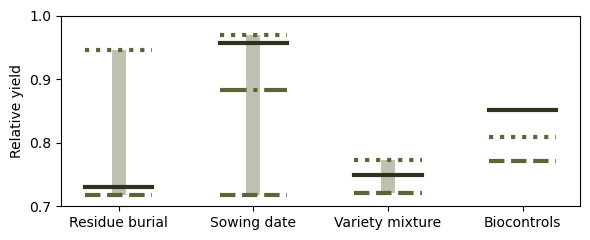

In [3]:
# Copy and paste the yields which were output in each of Fitting_1...4
Y1 = [0.7213411004686073, 0.749334309958344, 0.7726474347614888]
Y2 = [0.7172895172657651, 0.9568669764410591, 0.969568094600089, 0.8836329953868599]
Y3 = [0.7172895244366988, 0.7307733424534126, 0.9462224362097315]
Y4 = [0.8088212948934402, 0.7711544243330894, 0.8512486622241164]

fig,ax = plt.subplots(1,figsize=(6,2.5))

# Order needs to be 3, 2, 1, 4
ax = yield_boxandwhisker([2,2.5],ax,Y1,1)
ax = yield_boxandwhisker([1,1.5],ax,Y2,2)
ax = yield_boxandwhisker([0,0.5],ax,Y3,3)
ax = yield_boxandwhisker([3,3.5],ax,Y4,4)
ax.set_ylim([0.7,1])
ax.set_ylabel("Relative yield",fontsize='10')

# Order needs to be 3, 2, 1, 4
labels = ["Residue burial", "Sowing date","Variety mixture" , "Biocontrols"]
ax.set_xticks([0.25,1.25,2.25,3.25],labels = labels,fontsize='10')
ax.set_yticks(ax.get_yticks(),np.round(ax.get_yticks(),2),fontsize='10')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_1controlyields.pdf', dpi=400)